# ProspAI - MVP algoritmo de predição

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import joblib

In [33]:
url = '../data/dataset_prospai.xlsx'
df = pd.read_excel(url)

### Análise Exploratória


In [34]:
df.head()

,Gênero,Faixa Etária,Escolaridade,Localização,Linguagem,Tipo de Campanha Mais Eficaz,Canal Preferido
0,Feminino,45-54,Superior Completo,Sudeste,Normal/Meio-termo,Campanhas de Desconto,Email
1,Feminino,35-44,Superior Completo,Nordeste,Normal/Meio-termo,Campanhas de Novos Produtos,SMS
2,Masculino,35-44,Superior Incompleto,Norte,Normal/Meio-termo,Campanhas de Novos Produtos,SMS
3,Outro,45-54,Fundamental Incompleto,Centro-Oeste,Normal/Meio-termo,Campanhas de Referência,SMS
4,Feminino,65+,Superior Completo,Norte,Formal,Campanhas de Retenção,SMS


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gênero                        3000 non-null   object
 1   Faixa Etária                  3000 non-null   object
 2   Escolaridade                  3000 non-null   object
 3   Localização                   3000 non-null   object
 4   Linguagem                     3000 non-null   object
 5   Tipo de Campanha Mais Eficaz  3000 non-null   object
 6   Canal Preferido               3000 non-null   object
dtypes: object(7)
memory usage: 164.2+ KB


In [36]:
df.nunique()

Gênero                          3
Faixa Etária                    7
Escolaridade                    7
Localização                     5
Linguagem                       3
Tipo de Campanha Mais Eficaz    5
Canal Preferido                 5
dtype: int64

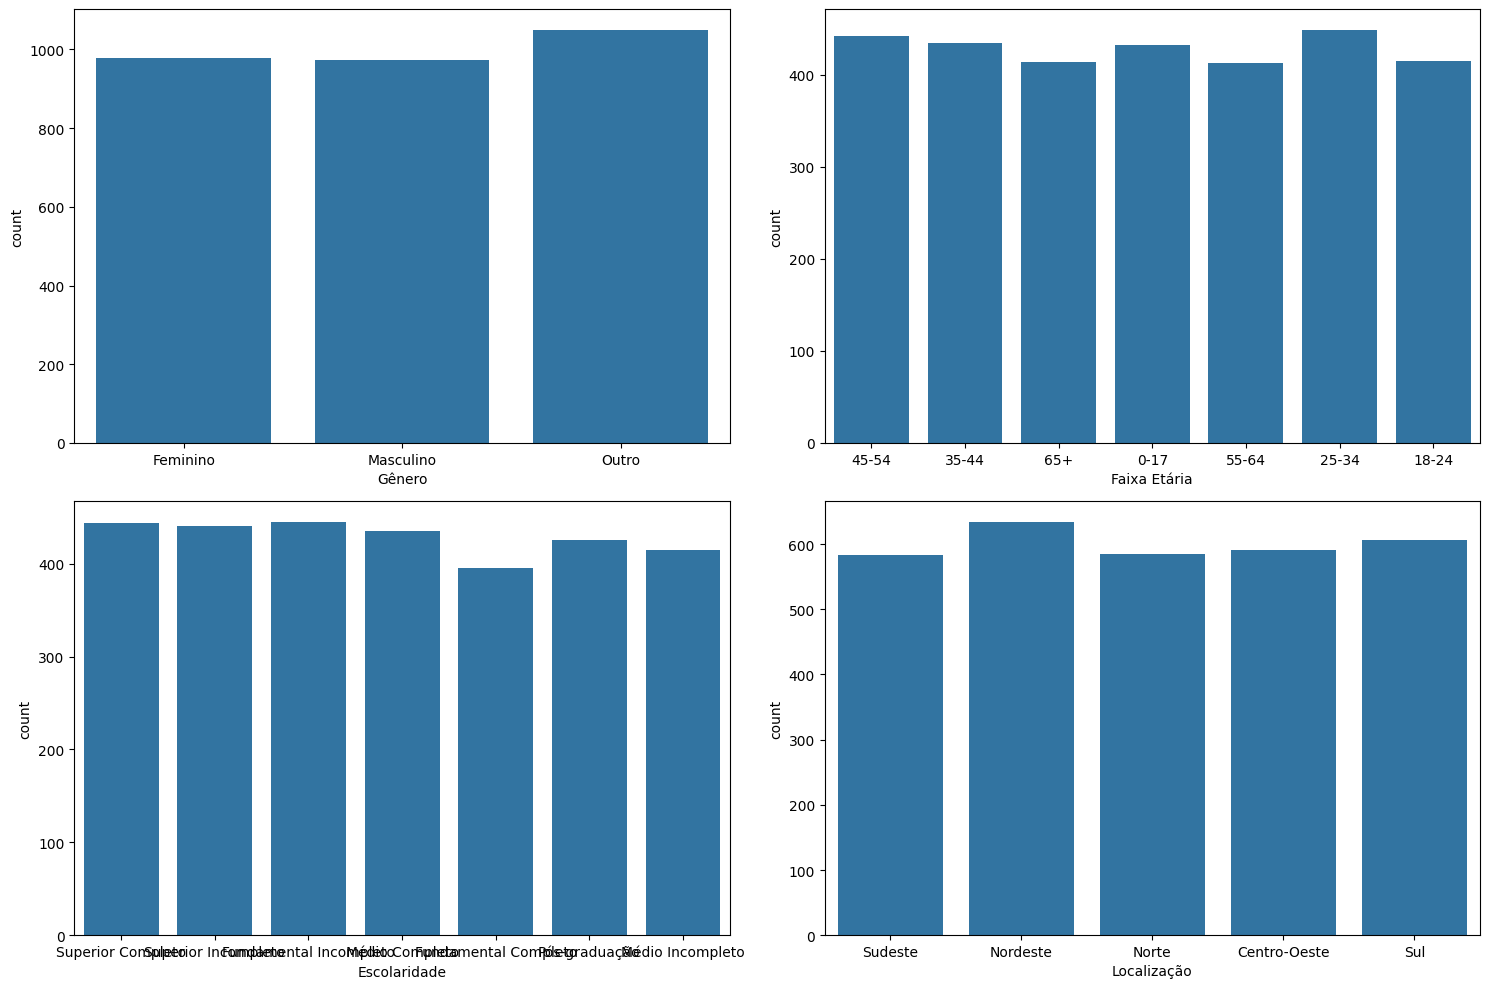

In [37]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
sns.countplot(x='Gênero', data=df, ax=ax[0, 0])
sns.countplot(x='Faixa Etária', data=df, ax=ax[0, 1])
sns.countplot(x='Escolaridade', data=df, ax=ax[1, 0])
sns.countplot(x='Localização', data=df, ax=ax[1, 1])
plt.tight_layout()
plt.show()

### Limpeza e Organização dos Dados

In [38]:
df.rename(columns={'Tipo de Campanha Mais Eficaz': 'Campanha Preferida'}, inplace=True)
df.rename(columns={'Linguagem': 'Linguagem Preferida'}, inplace=True)

In [39]:
df_clean = df

In [40]:
maping = {
    'Masculino' : 0,
    'Feminino': 1,
    'Outro': 2
}
df_clean['Gênero'] = df_clean['Gênero'].replace(maping)

maping2 = {
    '0-17' : 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55-64': 5,
    '65+': 6
}
df_clean['Faixa Etária'] = df_clean['Faixa Etária'].replace(maping2)

maping = {
    'Fundamental Incompleto' : 0,
    'Fundamental Completo': 1,
    'Médio Incompleto': 2,
    'Médio Completo': 3,
    'Superior Incompleto': 4,
    'Superior Completo': 5,
    'Pós-graduação': 6
}
df_clean['Escolaridade'] = df_clean['Escolaridade'].replace(maping)

maping = {
    'Sul' : 0,
    'Sudeste': 1,
    'Centro-Oeste': 2,
    'Norte': 3,
    'Nordeste': 4
}
df_clean['Localização'] = df_clean['Localização'].replace(maping)

maping = {
    'Informal': 0,
    'Normal/Meio-termo': 1,
    'Formal': 2
}
df_clean['Linguagem Preferida'] = df_clean['Linguagem Preferida'].replace(maping)

maping = {
    'Campanhas de Desconto': 0,
    'Campanhas de Novos Produtos': 1,
    'Campanhas de Referência': 2,
    'Campanhas de Retenção': 3,
    'Programas de Fidelidade': 4
}
df_clean['Campanha Preferida'] = df_clean['Campanha Preferida'].replace(maping)

maping = {
    'Email': 0,
    'WhatsApp': 1,
    'SMS': 2,
    'Redes Sociais': 3,
    'App Notificações': 4
}
df_clean['Canal Preferido'] = df_clean['Canal Preferido'].replace(maping)

C:\Users\AgathaPereiraPires\AppData\Local\Temp\ipykernel_35020\1365699776.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Gênero'] = df_clean['Gênero'].replace(maping)
C:\Users\AgathaPereiraPires\AppData\Local\Temp\ipykernel_35020\1365699776.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['Faixa Etária'] = df_clean['Faixa Etária'].replace(maping2)
C:\Users\AgathaPereiraPires\AppData\Local\Temp\ipykernel_35020\1365699776.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be re

In [41]:
df_clean.head()

,Gênero,Faixa Etária,Escolaridade,Localização,Linguagem Preferida,Campanha Preferida,Canal Preferido
0,1,4,5,1,1,0,0
1,1,3,5,4,1,1,2
2,0,3,4,3,1,1,2
3,2,4,0,2,1,2,2
4,1,6,5,3,2,3,2


### Classificação | Treinando o modelo

In [42]:
X = df_clean[['Gênero', 'Faixa Etária', 'Escolaridade', 'Localização']]
y = df_clean[['Campanha Preferida', 'Canal Preferido', 'Linguagem Preferida']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
numeric_features = ['Gênero', 'Faixa Etária', 'Escolaridade', 'Localização']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(XGBClassifier()))
])

param_grid = {
    'classifier__estimator__n_estimators': [100, 200],
    'classifier__estimator__max_depth': [3, 5, 7],
    'classifier__estimator__learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Melhores parâmetros: {grid_search.best_params_}")

y_pred = best_model.predict(X_test)

c:\Users\AgathaPereiraPires\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1052: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Melhores parâmetros: {'classifier__estimator__learning_rate': 0.01, 'classifier__estimator__max_depth': 3, 'classifier__estimator__n_estimators': 100}


In [47]:
accuracy_campanha = accuracy_score(y_test['Campanha Preferida'], y_pred[:, 0])
accuracy_canal = accuracy_score(y_test['Canal Preferido'], y_pred[:, 1])
accuracy_linguagem = accuracy_score(y_test['Linguagem Preferida'], y_pred[:, 2])

print(f'Acurácia Campanha Preferida: {accuracy_campanha}')
print(f'Acurácia Canal Preferido: {accuracy_canal}')
print(f'Acurácia Linguagem Preferida: {accuracy_linguagem}')

Acurácia Campanha Preferida: 0.20666666666666667
Acurácia Canal Preferido: 0.215
Acurácia Linguagem Preferida: 1.0


In [48]:
novo_cliente = pd.DataFrame({
    'Gênero': [1],          # Exemplo: 1 para 'Feminino'
    'Faixa Etária': [2],    # Exemplo: 2 para '25-34'
    'Escolaridade': [5],    # Exemplo: 5 para 'Superior Completo'
    'Localização': [1]      # Exemplo: 1 para 'Sudeste'
})

predicao_novo_cliente = best_model.predict(novo_cliente)

mapa_inverso_campanha = {0: 'Campanhas de Desconto', 1: 'Campanhas de Novos Produtos', 2: 'Campanhas de Referência', 3: 'Campanhas de Retenção', 4: 'Programas de Fidelidade'}
mapa_inverso_canal = {0: 'Email', 1: 'WhatsApp', 2: 'SMS', 3: 'Redes Sociais', 4: 'App Notificações'}
mapa_inverso_linguagem = {0: 'Informal', 1: 'Normal/Meio-termo', 2: 'Formal'}

campanha_predita = mapa_inverso_campanha[predicao_novo_cliente[0][0]]
canal_predito = mapa_inverso_canal[predicao_novo_cliente[0][1]]
linguagem_predita = mapa_inverso_linguagem[predicao_novo_cliente[0][2]]

print(f"Predição para o novo cliente:")
print(f"Campanha Preferida: {campanha_predita}")
print(f"Canal Preferido: {canal_predito}")
print(f"Linguagem Preferida: {linguagem_predita}")

Predição para o novo cliente:
Campanha Preferida: Campanhas de Desconto
Canal Preferido: Email
Linguagem Preferida: Informal


In [46]:
joblib.dump(best_model, 'modelo_marketing.pkl')

['modelo_marketing.pkl']